In [1]:
import pandas as pd
import numpy as np
import joblib
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import pickle as pkl
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from scipy import sparse


#import nltk
#nltk.download('stopwords')


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
df = pd.read_csv("NETFLIX_REVIEWS.csv", index_col=0)
df.head(5)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,7e73f80e-a8fd-4ff3-b09b-502f0ad058ff,152618553977019693742,A Google user,Works great on my Evo! Glad android phones are...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:37
1,dab55eca-c2a0-45a8-93e3-9860c1c548da,234382942865437071667,A Google user,Works great on HTC incredible. Can't wait to t...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:52
2,a3b8fa06-8b8f-4f2f-a1fa-fd37c4cbf598,174473604608358796368,A Google user,Works great on nexus s,5,0,1.5.2 build 389,2011-05-12 18:55:14
3,837fdfa5-606d-4cec-9e9a-e4a83dad633e,286593453219054880269,A Google user,"Working perfect for me on EVO, running CM 7.0.3.1",5,0,1.2.1 build 843839-1.2.0-30,2011-05-12 19:31:46
4,a8aaecb2-6984-44f7-b958-3f89f64d75f9,167276875678680630145,A Google user,cm7 2.3.3 N1,5,0,1.5.2 build 389,2011-05-12 19:32:50


In [3]:
df.tail(5)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
1531121,5b819b4a-f49f-4012-b1cc-146b581aec6e,517084783367708002209,Az*********er,Bad app,1,0,NaN,2023-11-15 22:34:37
1531122,afe340b9-68df-4df9-8a86-7e9304e1e271,217585066694826156159,Ma***********ey,What more do you want from me tf? BRING BACK P...,2,0,8.94.0 build 10 50546,2023-11-15 22:44:59
1531123,3015ab73-75e8-4f17-8377-4757abbb8f0c,268385941811343301666,Em************ey,I will love this app,5,0,NaN,2023-11-15 22:45:05
1531124,25b4b68e-a432-4f21-bf1c-68835f88b56e,259993922622854778058,****,The content is great but they keep adding more...,2,0,8.94.0 build 10 50546,2023-11-15 22:48:54
1531125,7c8e755c-0505-4e0c-ac89-719f8f5fff50,527925027675131929486,Ra************on,"I promise you on this, I WILL NOT RESUBSCRIBE ...",1,1,8.94.0 build 10 50546,2023-11-15 22:54:42


In [4]:
# Store and print the initial number of rows in the DataFrame
nr_rows1 = df.shape[0]  
print(f"There are {nr_rows1} rows in the dataset.")

df = df.drop_duplicates()  # Remove duplicate rows from the DataFrame
nr_rows2 = df.shape[0]  # Store the number of rows after removing duplicates

# Print the number of duplicates that were removed
print(f"There are {nr_rows1-nr_rows2} duplicated rows found in the dataset.")  

There are 1531126 rows in the dataset.
There are 0 duplicated rows found in the dataset.


In [5]:
# Specify the column names to remove
columns_to_remove = ['review_id', 'pseudo_author_id', 'author_name', 'author_app_version']

# Remove the specified columns that is not included later
df1 = df.drop(columns_to_remove, axis=1)

df1.head(5)

,review_text,review_rating,review_likes,review_timestamp
0,Works great on my Evo! Glad android phones are...,5,1,2011-05-12 18:50:37
1,Works great on HTC incredible. Can't wait to t...,5,1,2011-05-12 18:50:52
2,Works great on nexus s,5,0,2011-05-12 18:55:14
3,"Working perfect for me on EVO, running CM 7.0.3.1",5,0,2011-05-12 19:31:46
4,cm7 2.3.3 N1,5,0,2011-05-12 19:32:50


In [116]:
# Convert the timestamp column to datetime format
df1['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

# Extract only the year portion
df1['review_year'] = df1['review_timestamp'].dt.year

# Drop the original timestamp column
df2 = df1.drop('review_timestamp', axis=1)

# Filter the dataframe to include only the years from 2017 to 2023
df3 = df2[(df2['review_year'] >= 2017) & (df2['review_year'] <= 2023)]

# Reset the index of the dataframe
df3 = df3.reset_index(drop=True)

# Display the first 5 rows of the dataframe
df3.head(5)

,review_text,review_rating,review_likes,review_year
0,"I'd love to use it with my new membership, but...",2,1,2017
1,Right know I can not download vids or movies s...,4,0,2017
2,How it has New moves😊😊😊😚😍,5,0,2017
3,I like are should I say love it because you ca...,5,0,2017
4,Yay,5,0,2017


In [7]:
df3.tail()

,review_text,review_rating,review_likes,review_year
1121429,Bad app,1,0,2023
1121430,What more do you want from me tf? BRING BACK P...,2,0,2023
1121431,I will love this app,5,0,2023
1121432,The content is great but they keep adding more...,2,0,2023
1121433,"I promise you on this, I WILL NOT RESUBSCRIBE ...",1,1,2023


In [1]:
###Visualization Part

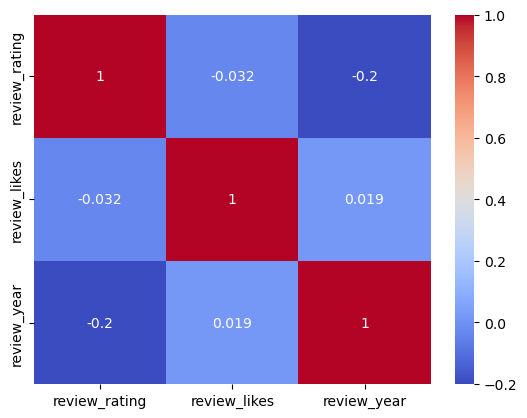

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with multiple columns
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [131]:
print(" ")
min_rating = df3['review_rating'].min()
max_rating = df3['review_rating'].max()
print(f"Range of review_rating: {min_rating} to {max_rating}")
min_likes = df3['review_likes'].min()
max_likes = df3['review_likes'].max()
print(f"Range of review_likes: {min_likes} to {max_likes}")

 
Range of review_rating: 1 to 5
Range of review_likes: 0 to 8231


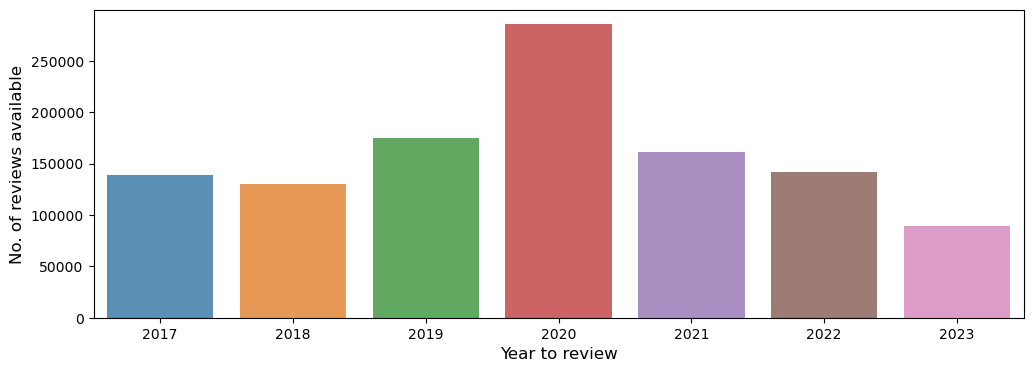

In [132]:
cnt_year = df3['review_year'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_year.index, y=cnt_year.values, alpha=0.8)
plt.xlabel('Year to review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

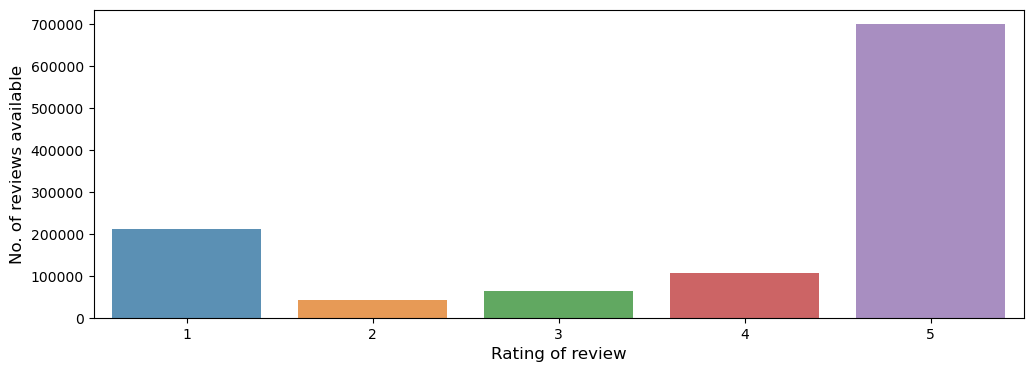

In [133]:
cnt_rating = df3['review_rating'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_rating.index, y=cnt_rating.values, alpha=0.8)
plt.xlabel('Rating of review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

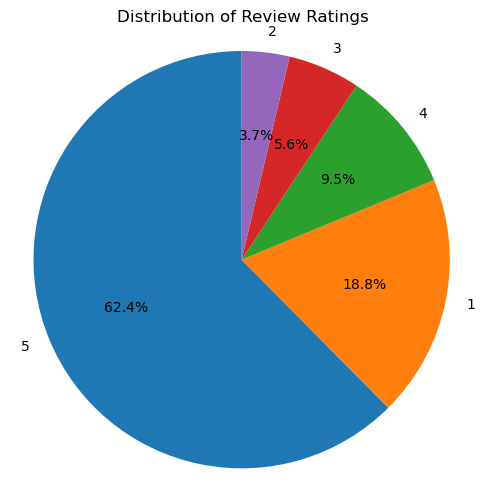

In [152]:
cnt_rating = df3['review_rating'].value_counts()

plt.figure(figsize=(6, 6))  # Set the figure size as square for a better representation of the pie chart
plt.pie(cnt_rating.values, labels=cnt_rating.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Distribution of Review Ratings')
plt.show()

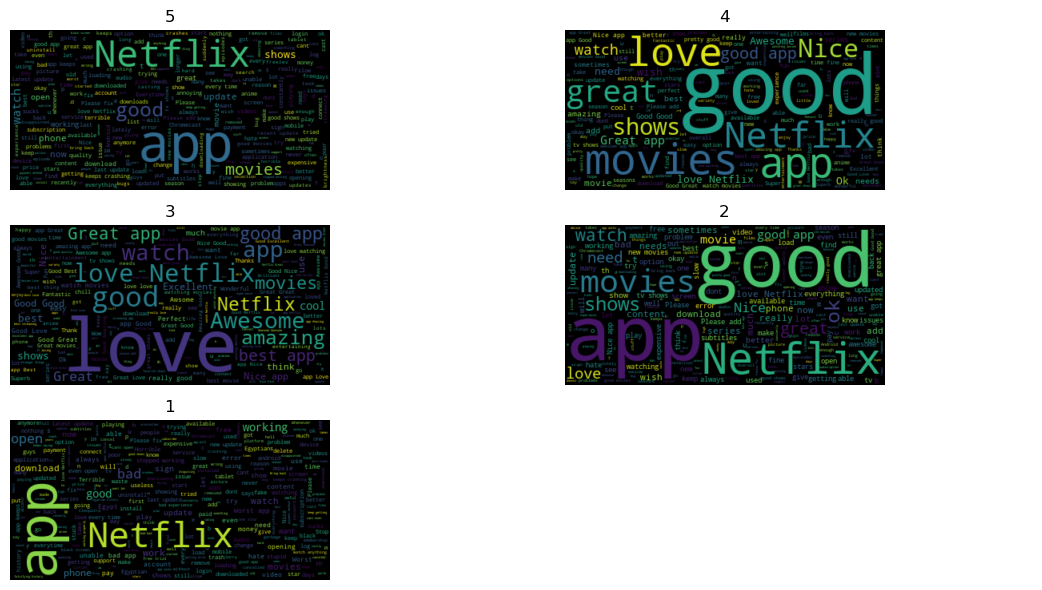

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Determine the number of unique ratings
unique_ratings = len(df3['review_rating'].unique())

# Calculate the number of rows and columns for the subplots
num_rows = (unique_ratings + 1) // 2  # Round up to the nearest integer
num_cols = 2

# Adjust the figsize and dpi parameters to control the overall size and resolution
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6), dpi=100)

k = 0
for i, ax in enumerate(axs.reshape(-1)):
    if k >= unique_ratings:
        ax.axis('off')
        continue

    dfplot = df3[df3['review_rating'] == df3['review_rating'].unique()[k]]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(dfplot['review_text'].to_string())
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(df['review_rating'].unique()[k])
    ax.axis('off')
    k += 1

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [137]:
from collections import Counter

#Finding the most common words in all posts.
words = list(df4["review_text"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 4941),
 ('the', 4755),
 ('to', 4047),
 ('and', 3798),
 ('it', 3665),
 ('is', 2713),
 ('app', 2614),
 ('a', 2155),
 ('my', 1772),
 ('of', 1725),
 ('on', 1585),
 ('for', 1539),
 ('Netflix', 1527),
 ('good', 1477),
 ('you', 1456),
 ('movies', 1424),
 ('love', 1401),
 ('but', 1385),
 ('this', 1265),
 ('have', 1223),
 ('watch', 1215),
 ('not', 1204),
 ('in', 1143),
 ('i', 1086),
 ('Good', 1061),
 ('that', 1034),
 ('like', 909),
 ('shows', 866),
 ('so', 840),
 ('can', 742),
 ('all', 716),
 ('It', 703),
 ('with', 692),
 ('are', 652),
 ('me', 642),
 ('Love', 634),
 ('Great', 627),
 ('great', 598),
 ('just', 597),
 ('more', 592)]

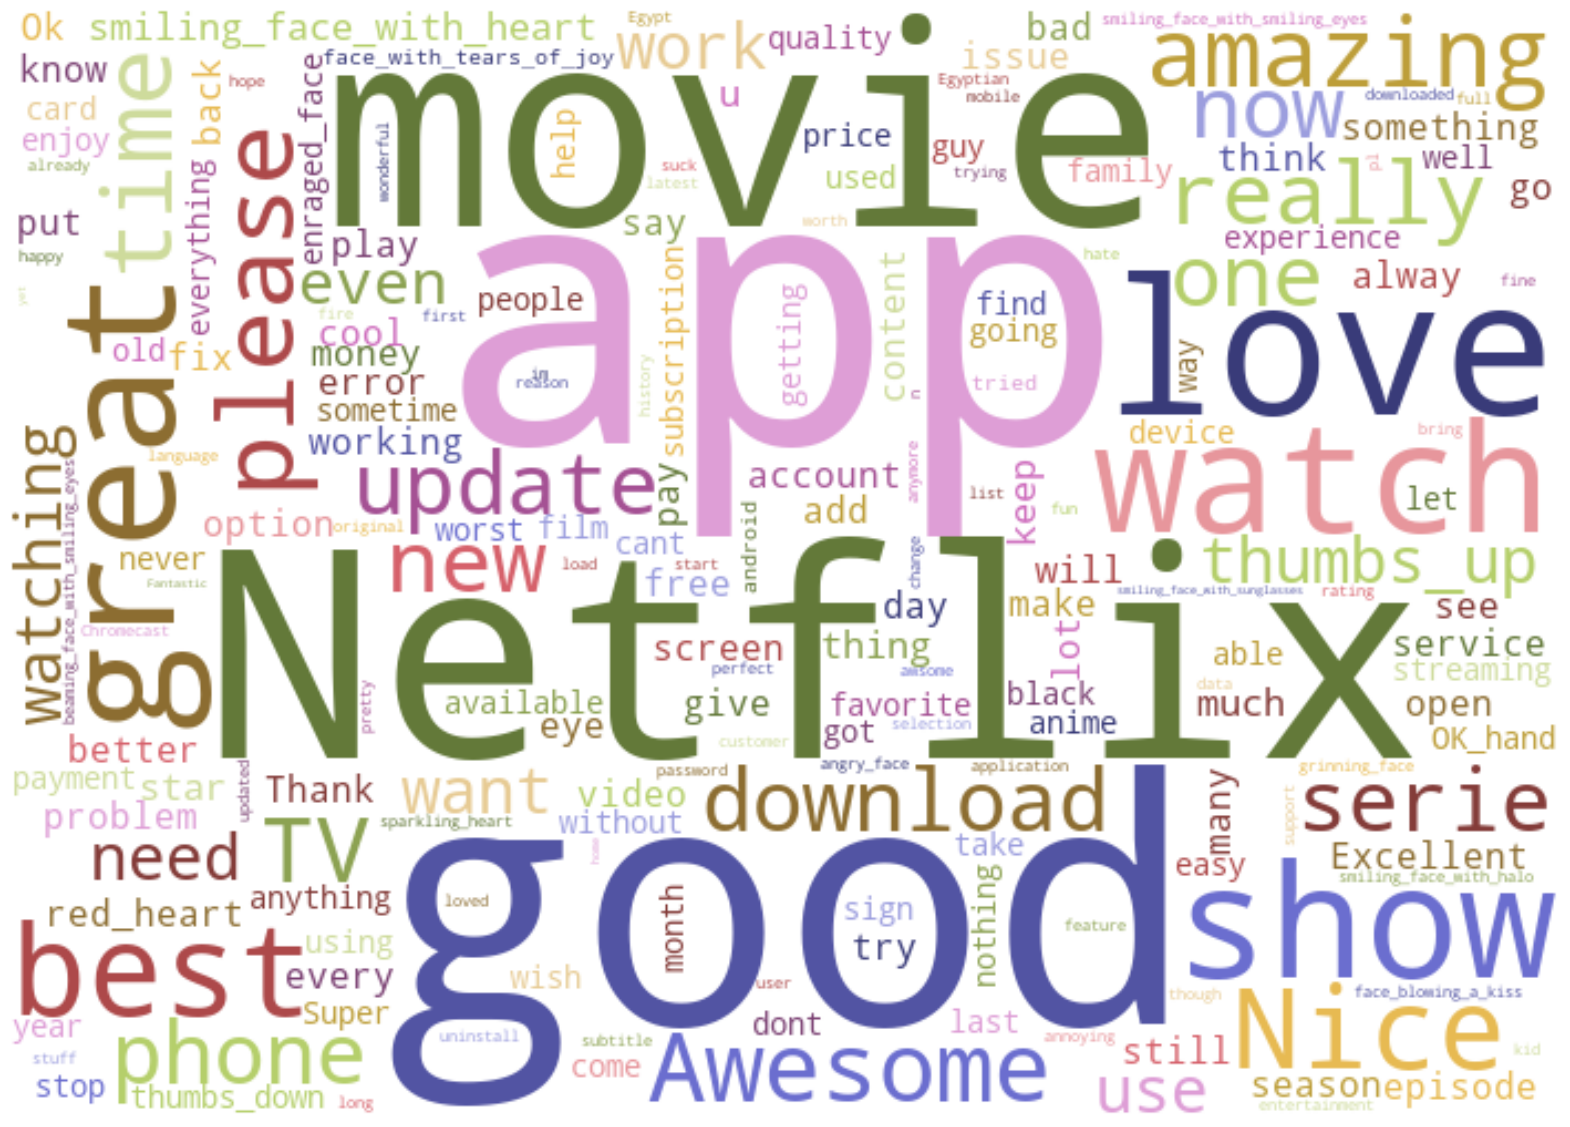

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wc = WordCloud(width=700, height=500,
               collocations=False, background_color="white",
               colormap="tab20b").generate(" ".join(words))

# Set up the plot
plt.figure(figsize=(20,20))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

(array([210758.,      0.,  41506.,      0.,      0.,  62789.,      0.,
        106186.,      0., 700195.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

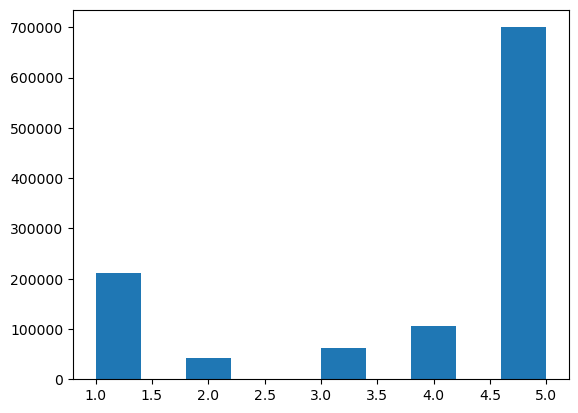

In [142]:
plt.hist(df3['review_rating'])

In [143]:
column_name = 'review_likes'  # Replace with the actual column name

column_min = df3[column_name].min()
column_max = df3[column_name].max()

print(f"The range of values in {column_name} column: {column_min} to {column_max}")

The range of values in review_likes column: 0 to 8231


In [144]:
# Convert 'rating_year' column to integer (if it's stored as string)
df4['review_year'] = df4['review_year'].astype(int)

# Create a new column to categorize the time periods
df4['time_period'] = pd.cut(df4['review_year'], bins=[2016, 2019, 2022, 2024], labels=['2017-2019', '2020-2022', '2023'])

# Calculate the average ratings per time period
avg_ratings = df4.groupby('time_period')['review_rating'].mean()

# Print the average ratings per time period
print(avg_ratings)

time_period
2017-2019    4.205629
2020-2022    3.919700
2023         2.887403
Name: review_rating, dtype: float64


In [147]:
avg_ratings = df4.groupby('review_year')['review_rating'].mean()
print(avg_ratings)

review_year
2017    4.339641
2018    4.157573
2019    4.135292
2020    4.042558
2021    3.859077
2022    3.731988
2023    2.887403
Name: review_rating, dtype: float64


In [82]:
#import pandas as pd
import emoji

# Define a function to convert emojis to text
def convert_emoji_to_text(text):
    if isinstance(text, float):
        return str(text)  # Convert float values to string representation, 如果相同，可不可以只保留一个
    return emoji.demojize(text)

# Apply the function to the column containing emojis
emoji_column = 'review_text'  # Replace with the actual column name containing emojis
df33[emoji_column] = df33[emoji_column].apply(convert_emoji_to_text)

# Save the modified DataFrame to a new DataFrame variable

df33['review_text'].unique()

array(['I\'d love to use it with my new membership, but the first pop-up that tells me how to download things crashes the app on my phone (Nexus 6P, Android 7.1). I don\'t get past the "who\'s watching?" Screen.',
       "Right know I can not download vids or movies so I am wondering if netflix got hacked or it's not working but it is a great app all though netflix please fix this",
       'How it has New moves:smiling_face_with_smiling_eyes::smiling_face_with_smiling_eyes::smiling_face_with_smiling_eyes::kissing_face_with_closed_eyes::smiling_face_with_heart-eyes:',
       ..., 'I will love this app',
       'The content is great but they keep adding more sound effects to the UI that you cannot disable. So now I need to make sure I have my earbuds in before I even start to watch anything at night so as not to wake up my wife. Most useless and dumb feature ever.',
       "I promise you on this, I WILL NOT RESUBSCRIBE ONCE MY MONTH IS UP!! Nothing but ads all over, no time to watch the 

In [83]:
import re
def text_preprocessing(text):
    text = re.sub(r'[^a-zA-Z\s]', " ", str(text))
    text = re.sub(r'[^\w\s]', ' ', str(text))
    text = re.sub(r'http\S+', ' ', str(text))
    text = text.lower()
    return text

In [84]:
df33["review_text"] = df33['review_text'].apply(text_preprocessing)

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df3

# Filter the dataframe based on review_rating and review_year conditions
filtered_df1 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'].between(2017, 2019))]
filtered_df2 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'].between(2020, 2022))]
filtered_df3 = df3[(df3['review_rating'].isin([1, 2])) & (df3['review_year'] == 2023)]

# Convert 'review_text' column to string type
filtered_df1['review_text'] = filtered_df1['review_text'].astype(str)
filtered_df2['review_text'] = filtered_df2['review_text'].astype(str)
filtered_df3['review_text'] = filtered_df3['review_text'].astype(str)

# Generate word cloud for filtered_df1
wordcloud1 = WordCloud().generate(' '.join(filtered_df1['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2017-2019, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df2
wordcloud2 = WordCloud().generate(' '.join(filtered_df2['review_text']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2020-2022, Rating 1-2)")
plt.show()

# Generate word cloud for filtered_df3
wordcloud3 = WordCloud().generate(' '.join(filtered_df3['review_text']))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (2023, Rating 1-2)")
plt.show()

In [145]:
###Data Processing

In [117]:
import pandas as pd
import numpy as np

# Specify the percentage of the dataset you want to retain
sample_percentage = 2.7

# Randomly sample the dataset
df4 = df3.sample(frac=sample_percentage/100)  # Select a percentage of the dataset

# Balance the number of records for each year
years_to_balance = list(range(2017, 2024))
balanced_data = pd.DataFrame()

for year in years_to_balance:
    year_data = df4[df4['review_year'] == year]
    num_samples = len(year_data)
    
    if num_samples > 0:
        max_samples = min(num_samples, df4['review_year'].value_counts().min())
        sampled_data = year_data.sample(n=max_samples, replace=False, random_state=42)
        balanced_data = pd.concat([balanced_data, sampled_data])

df4 = balanced_data

'''# Balance the number of records for each rating (1-5)
ratings_to_balance = [1, 2, 3, 4, 5]
balanced_data = pd.DataFrame()

for rating in ratings_to_balance:
    rating_data = df4[df4['review_rating'] == rating]
    num_samples = len(rating_data)
    
    if num_samples > 0:
        max_samples = min(num_samples, df4['review_rating'].value_counts().min())
        sampled_data = rating_data.sample(n=max_samples, replace=False, random_state=42)
        balanced_data = pd.concat([balanced_data, sampled_data])

df4 = balanced_data'''

# Sort the DataFrame by review_year
df4_sorted = df4.sort_values('review_year')

# Reset the index of the DataFrame
df4_indexed = df4_sorted.reset_index(drop=True)

# Make a copy of the indexed DataFrame
df4 = df4_indexed.copy()

In [118]:
df4.tail(5)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16674 entries, 0 to 16673
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    16668 non-null  object
 1   review_rating  16674 non-null  int64 
 2   review_likes   16674 non-null  int64 
 3   review_year    16674 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 521.2+ KB


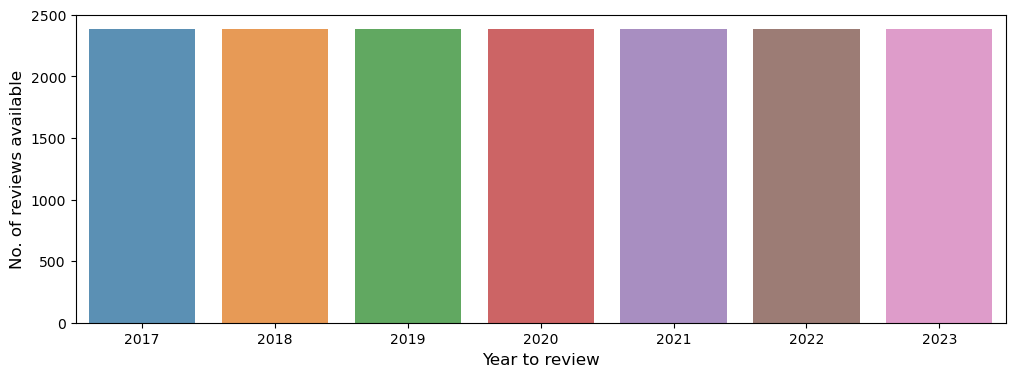

In [119]:
cnt_year = df4['review_year'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_year.index, y=cnt_year.values, alpha=0.8)
plt.xlabel('Year to review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

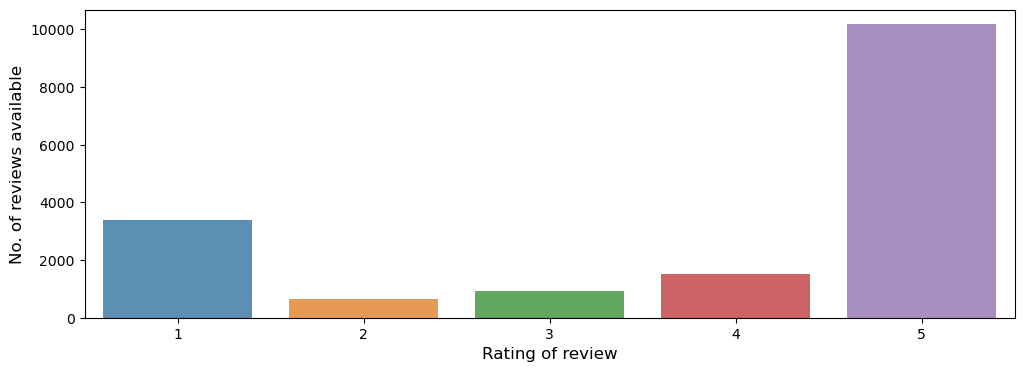

In [120]:
cnt_rating = df4['review_rating'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_rating.index, y=cnt_rating.values, alpha=0.8)
plt.xlabel('Rating of review', fontsize=12)
plt.ylabel('No. of reviews available', fontsize=12)
plt.show()

In [121]:
df4['review_text'].unique()

array(['The recent update has rendered this app useless on my Pixel. Please fix it!',
       'I love you Netflix everybody in the world should have this app special on its own😍😍😍😋',
       'Awesome', ...,
       'Please add dynamic theme app icon for Android. Thanks!',
       'Badhasoo@', "Don't really have anything"], dtype=object)

In [122]:
#import pandas as pd
import emoji

# Define a function to convert emojis to text
def convert_emoji_to_text(text):
    if isinstance(text, float):
        return str(text)  # Convert float values to string representation, 如果相同，可不可以只保留一个
    return emoji.demojize(text)

# Apply the function to the column containing emojis
emoji_column = 'review_text'  # Replace with the actual column name containing emojis
df4[emoji_column] = df4[emoji_column].apply(convert_emoji_to_text)

# Save the modified DataFrame to a new DataFrame variable
df5 = df4.copy()

df5['review_text'].unique()

array(['The recent update has rendered this app useless on my Pixel. Please fix it!',
       'I love you Netflix everybody in the world should have this app special on its own:smiling_face_with_heart-eyes::smiling_face_with_heart-eyes::smiling_face_with_heart-eyes::face_savoring_food:',
       'Awesome', ...,
       'Please add dynamic theme app icon for Android. Thanks!',
       'Badhasoo@', "Don't really have anything"], dtype=object)

In [123]:
import re
def text_preprocessing(text):
    text = re.sub(r'[^a-zA-Z\s]', " ", str(text))
    text = re.sub(r'[^\w\s]', ' ', str(text))
    text = re.sub(r'http\S+', ' ', str(text))
    text = text.lower()
    return text

In [124]:
df5["review_text"] = df5['review_text'].apply(text_preprocessing)

In [125]:
df5.head()

,review_text,review_rating,review_likes,review_year
0,the recent update has rendered this app useles...,1,0,2017
1,i love you netflix everybody in the world shou...,5,0,2017
2,awesome,4,0,2017
3,it dosen t work,1,0,2017
4,awesome,5,0,2017


In [126]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmetizer = WordNetLemmatizer()
#remove stopwords
stop_words = stopwords.words('english')
df5['review_text'] = df5['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [127]:
df5.head()

,review_text,review_rating,review_likes,review_year
0,recent update rendered app useless pixel pleas...,1,0,2017
1,love netflix everybody world app special smili...,5,0,2017
2,awesome,4,0,2017
3,dosen work,1,0,2017
4,awesome,5,0,2017


In [128]:
import pandas as pd


max_words = 0

# Iterate over each row in the column
for index, row in df5.iterrows():
    # Split the text into words and count the number of words
    words = row['review_text'].split()
    num_words = len(words)
    
    # Update the maximum number of words if necessary
    if num_words > max_words:
        max_words = num_words

# The maximum number of words in the column
print("Maximum number of words:", max_words)

Maximum number of words: 668


In [129]:
max_value = np.max(x)
print('Maximum value in x:', max_value)

Maximum value in x: 10913


In [130]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

max_length = 2000   
vocabs = 15000

def convert_to_number(text):
    tokenizer = Tokenizer(
        num_words=vocabs,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        lower=True,
        split=' ',
        char_level=False,
        oov_token="<oov>",
        analyzer=None,
    )
    tokenizer.fit_on_texts(text)
    sequence = tokenizer.texts_to_sequences(text)
    pad_sequence = pad_sequences(sequence,padding='pre',maxlen=max_length)

    return pad_sequence

x = convert_to_number(df5["review_text"])

In [131]:
print(x[:10])

[[   0    0    0 ...  857   18   44]
 [   0    0    0 ...    3  690  630]
 [   0    0    0 ...    0    0   16]
 ...
 [   0    0    0 ...   59  257 1784]
 [   0    0    0 ...   12  202   12]
 [   0    0    0 ...   18   78  186]]


In [132]:
from sklearn.model_selection import train_test_split

y = df5["review_rating"]


In [133]:
#no scale
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit model on training data
model = svm.SVC(kernel='rbf', random_state=42, C=0.5)
model.fit(x_train, y_train)

# Evaluate the model on train set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True)


print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (weighted average): {:.3f}'.format(test_report['weighted avg']['precision']))
print('Test Recall (weighted average): {:.3f}'.format(test_report['weighted avg']['recall']))
print('Test F1-score (weighted average): {:.3f}'.format(test_report['weighted avg']['f1-score']))

Train Accuracy: 0.647
Train Error: 3.394
Test Accuracy: 0.626
Test Error: 3.557
Test Precision (weighted average): 0.481
Test Recall (weighted average): 0.626
Test F1-score (weighted average): 0.535


/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dakow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
#scale
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit model on training data
model = svm.SVC(kernel='rbf', random_state=42, C=0.5)
model.fit(x_train_scaled, y_train)

# Evaluate the model on train set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True, zero_division=1)


print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (weighted average): {:.3f}'.format(test_report['weighted avg']['precision']))
print('Test Recall (weighted average): {:.3f}'.format(test_report['weighted avg']['recall']))
print('Test F1-score (weighted average): {:.3f}'.format(test_report['weighted avg']['f1-score']))

Train Accuracy: 0.631
Train Error: 3.636
Test Accuracy: 0.617
Test Error: 3.724
Test Precision (weighted average): 0.659
Test Recall (weighted average): 0.617
Test F1-score (weighted average): 0.506


In [ ]:
#Random Forest

In [135]:
#scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))

Train Accuracy: 0.952
Train Error: 0.275
Test Accuracy: 0.662
Test Error: 2.816


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True)

print(" ")

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (weighted average): {:.3f}'.format(test_report['weighted avg']['precision']))
print('Test Recall (weighted average): {:.3f}'.format(test_report['weighted avg']['recall']))
print('Test F1-score (weighted average): {:.3f}'.format(test_report['weighted avg']['f1-score']))

Train Accuracy: 0.952
Train Error: 0.275
 
Test Accuracy: 0.663
Test Error: 2.816
Test Precision (weighted average): 0.564
Test Recall (weighted average): 0.663
Test F1-score (weighted average): 0.600


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))

# Make predictions for the test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, output_dict=True, zero_division=1)

print(" ")

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Test Precision (weighted average): {:.3f}'.format(test_report['weighted avg']['precision']))
print('Test Recall (weighted average): {:.3f}'.format(test_report['weighted avg']['recall']))
print('Test F1-score (weighted average): {:.3f}'.format(test_report['weighted avg']['f1-score']))

Train Accuracy: 0.952
Train Error: 0.275
 
Test Accuracy: 0.663
Test Error: 2.816
Test Precision (weighted average): 0.564
Test Recall (weighted average): 0.663
Test F1-score (weighted average): 0.600


In [121]:
from sklearn.model_selection import cross_val_score

# Assuming you have defined and preprocessed your feature data (X) and target labels (y)

# Create your model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated scores
print("Cross-Validated Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validated Scores: [0.67875186 0.66745914 0.64595719 0.64565993 0.63466112]
Mean CV Score: 0.6544978471465195


In [78]:
#XGBoost

In [142]:
#not scale
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

y_converted = df5["review_rating"]-1

x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

# Make predictions for the test data
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Calculate precision, recall, and F1 score for the test data
classification_report_test = classification_report(y_test, y_test_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))
print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', classification_report_test)

Train Accuracy: 0.865
Train Error: 1.044
Test Accuracy: 0.676
Test Error: 2.616
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.51      0.59      0.55       998
           1       0.12      0.01      0.03       207
           2       0.08      0.01      0.02       308
           3       0.12      0.01      0.02       462
           4       0.74      0.92      0.82      3028

    accuracy                           0.68      5003
   macro avg       0.31      0.31      0.29      5003
weighted avg       0.57      0.68      0.61      5003



In [143]:
#scale
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

y_converted = df5["review_rating"]-1

x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = mean_squared_error(y_train, y_train_pred)

# Make predictions for the test data
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Calculate precision, recall, and F1 score for the test data
classification_report_test = classification_report(y_test, y_test_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))
print('Train Error: {:.3f}'.format(train_error))
print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Error: {:.3f}'.format(test_error))
print('Classification Report (Test Data):\n', classification_report_test)

Train Accuracy: 0.865
Train Error: 1.044
Test Accuracy: 0.676
Test Error: 2.616
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.51      0.59      0.55       998
           1       0.12      0.01      0.03       207
           2       0.08      0.01      0.02       308
           3       0.12      0.01      0.02       462
           4       0.74      0.92      0.82      3028

    accuracy                           0.68      5003
   macro avg       0.31      0.31      0.29      5003
weighted avg       0.57      0.68      0.61      5003



In [ ]:
#Neural Network

In [144]:
#resample, converted, not scale
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 15000

y_converted = df5["review_rating"]-1

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=7, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Classification Report:')
print(test_report)

Epoch 1/7
365/365 [==============================] - 100s 269ms/step - loss: 1.0416 - accuracy: 0.6830
Epoch 2/7
365/365 [==============================] - 83s 227ms/step - loss: 0.7496 - accuracy: 0.7627
Epoch 3/7
365/365 [==============================] - 86s 236ms/step - loss: 0.6621 - accuracy: 0.7805
Epoch 4/7
365/365 [==============================] - 75s 207ms/step - loss: 0.5909 - accuracy: 0.8004
Epoch 5/7
365/365 [==============================] - 78s 214ms/step - loss: 0.5296 - accuracy: 0.8244
Epoch 6/7
365/365 [==============================] - 92s 253ms/step - loss: 0.4553 - accuracy: 0.8543
Epoch 7/7
365/365 [==============================] - 10s 27ms/step
Train Accuracy: 0.905
157/157 [==============================] - 4s 28ms/step
Test Accuracy: 0.707
Classification Report:
              precision    recall  f1-score   support

           0      0.622     0.670     0.645       998
           1      0.217     0.087     0.124       207
           2      0.191     0.127  

In [147]:
#resample, converted, not scale
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 15000

y_converted = df5["review_rating"]-1

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=6, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Classification Report:')
print(test_report)

Epoch 1/6
365/365 [==============================] - 87s 233ms/step - loss: 1.1390 - accuracy: 0.6154
Epoch 2/6
365/365 [==============================] - 87s 237ms/step - loss: 0.8195 - accuracy: 0.7339
Epoch 3/6
365/365 [==============================] - 79s 217ms/step - loss: 0.7014 - accuracy: 0.7727
Epoch 4/6
365/365 [==============================] - 82s 226ms/step - loss: 0.6278 - accuracy: 0.7930
Epoch 5/6
365/365 [==============================] - 76s 210ms/step - loss: 0.5582 - accuracy: 0.8143
Epoch 6/6
365/365 [==============================] - 12s 32ms/step
Train Accuracy: 0.868
157/157 [==============================] - 5s 33ms/step
Test Accuracy: 0.714
Classification Report:
              precision    recall  f1-score   support

           0      0.621     0.727     0.670       998
           1      0.000     0.000     0.000       207
           2      0.254     0.104     0.147       308
           3      0.236     0.132     0.169       462
           4      0.799     0.

In [148]:
#resample, converted, not scale
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 15000

y_converted = df5["review_rating"]-1

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Classification Report:')
print(test_report)

Epoch 1/5
365/365 [==============================] - 82s 219ms/step - loss: 1.1000 - accuracy: 0.6216
Epoch 2/5
365/365 [==============================] - 99s 272ms/step - loss: 0.8288 - accuracy: 0.7406
Epoch 3/5
365/365 [==============================] - 72s 196ms/step - loss: 0.7330 - accuracy: 0.7674
Epoch 4/5
365/365 [==============================] - 73s 201ms/step - loss: 0.6730 - accuracy: 0.7778
Epoch 5/5
365/365 [==============================] - 16s 42ms/step
Train Accuracy: 0.801
157/157 [==============================] - 4s 28ms/step
Test Accuracy: 0.718
Classification Report:
              precision    recall  f1-score   support

           0      0.549     0.812     0.655       998
           1      1.000     0.000     0.000       207
           2      1.000     0.000     0.000       308
           3      0.250     0.039     0.067       462
           4      0.801     0.913     0.853      3028

    accuracy                          0.718      5003
   macro avg      0.720

In [146]:
#resample, converted, scale
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

embedding_dim = 100
vocab_size = 150000

y_converted = df5["review_rating"]-1

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_converted, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
model.fit(x_train_scaled, y_train, epochs=7, batch_size=32)

# Evaluate the model on the training set
y_train_pred = np.argmax(model.predict(x_train_scaled), axis=-1)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy: {:.3f}'.format(train_accuracy))

# Evaluate the model on the test set
y_test_pred = np.argmax(model.predict(x_test_scaled), axis=-1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, digits=3, zero_division=1)

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Classification Report:')
print(test_report)

Epoch 1/7
365/365 [==============================] - 153s 420ms/step - loss: 1.0789 - accuracy: 0.6299
Epoch 3/7
365/365 [==============================] - 128s 350ms/step - loss: 1.0723 - accuracy: 0.6320
Epoch 4/7
365/365 [==============================] - 112s 308ms/step - loss: 1.0683 - accuracy: 0.6341
Epoch 5/7
365/365 [==============================] - 110s 302ms/step - loss: 1.0630 - accuracy: 0.6376
Epoch 6/7
365/365 [==============================] - 128s 350ms/step - loss: 1.0558 - accuracy: 0.6397
Epoch 7/7
365/365 [==============================] - 13s 36ms/step
Train Accuracy: 0.645
157/157 [==============================] - 5s 30ms/step
Test Accuracy: 0.619
Classification Report:
              precision    recall  f1-score   support

           0      0.402     0.179     0.248       998
           1      0.250     0.005     0.009       207
           2      0.000     0.000     0.000       308
           3      0.077     0.002     0.004       462
           4      0.642  